In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
chennai_meteo = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Metrological Data/Chennai.csv', skiprows = 2, delimiter=',')
chennai_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,22.8,85,0.0,1011.8,8.6,18.7,30,15
1,2024-01-01T01:00,23.1,84,0.0,1013.0,7.9,16.6,5,344
2,2024-01-01T02:00,23.8,83,0.0,1013.9,9.3,16.2,4,344
3,2024-01-01T03:00,25.6,77,0.0,1014.7,9.7,13.7,3,358
4,2024-01-01T04:00,27.2,63,0.0,1015.0,10.2,13.2,35,32
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.9,84,0.0,1013.2,11.8,21.5,45,40
8780,2024-12-31T20:00,24.8,84,0.0,1012.2,11.6,21.1,45,39
8781,2024-12-31T21:00,24.6,84,0.0,1011.5,11.0,20.4,41,35
8782,2024-12-31T22:00,24.3,85,0.0,1010.9,10.0,19.0,38,30


In [3]:
chennai_pollutants = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Pollutants/Chennai.csv', delimiter= ',')
chennai_pollutants['Timestamp'] = chennai_meteo['time']
chennai_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
chennai_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,61.83,99.91,8.94,28.85,30.74,14.94,17.04,1.39,13.46,...,0.42,26.43,81.57,1.03,161.61,0.00,0.00,25.58,876.48,-0.48
1,2024-01-01T01:00,70.55,105.71,8.61,25.87,27.89,14.95,14.56,1.70,11.88,...,0.62,25.89,83.87,0.76,144.40,0.00,0.00,33.16,857.82,-0.49
2,2024-01-01T02:00,62.44,116.42,11.04,23.58,27.78,17.97,13.33,1.80,10.40,...,0.47,23.80,86.29,0.81,147.65,0.00,0.00,28.16,857.58,-0.49
3,2024-01-01T03:00,78.23,157.41,10.49,22.24,26.60,18.45,13.17,1.80,10.57,...,0.51,23.19,86.73,0.84,179.48,0.00,0.00,28.03,857.53,-0.49
4,2024-01-01T04:00,79.74,155.88,10.06,22.83,24.58,17.86,13.44,1.76,10.44,...,0.40,23.52,86.68,1.10,153.66,0.00,0.00,28.51,857.59,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,68.30,121.14,4.15,13.43,12.66,10.69,6.30,0.82,19.71,...,0.10,32.87,79.45,5.08,107.05,0.14,0.12,48.73,801.20,-0.50
8780,2024-12-31T20:00,72.18,124.18,4.58,13.38,12.97,10.92,6.01,0.88,19.78,...,0.15,32.84,80.05,5.10,103.91,0.14,0.12,48.58,801.59,-0.50
8781,2024-12-31T21:00,73.58,128.09,5.50,14.39,14.19,10.89,6.06,0.91,19.21,...,0.13,32.80,80.55,5.07,103.14,0.14,0.12,48.56,801.88,-0.50
8782,2024-12-31T22:00,73.77,127.11,5.73,12.34,13.30,10.63,6.58,0.89,18.08,...,0.37,32.78,81.26,5.05,85.61,0.14,0.12,48.35,801.98,-0.50


In [4]:
chennai = pd.merge(chennai_meteo.iloc[:, :], chennai_pollutants.iloc[:, 0:3], on='time')
chennai

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,22.8,85,0.0,1011.8,8.6,18.7,30,15,61.83,99.91
1,2024-01-01T01:00,23.1,84,0.0,1013.0,7.9,16.6,5,344,70.55,105.71
2,2024-01-01T02:00,23.8,83,0.0,1013.9,9.3,16.2,4,344,62.44,116.42
3,2024-01-01T03:00,25.6,77,0.0,1014.7,9.7,13.7,3,358,78.23,157.41
4,2024-01-01T04:00,27.2,63,0.0,1015.0,10.2,13.2,35,32,79.74,155.88
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.9,84,0.0,1013.2,11.8,21.5,45,40,68.30,121.14
8780,2024-12-31T20:00,24.8,84,0.0,1012.2,11.6,21.1,45,39,72.18,124.18
8781,2024-12-31T21:00,24.6,84,0.0,1011.5,11.0,20.4,41,35,73.58,128.09
8782,2024-12-31T22:00,24.3,85,0.0,1010.9,10.0,19.0,38,30,73.77,127.11


In [5]:
chennai['city'] = 'Chennai'
chennai

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,22.8,85,0.0,1011.8,8.6,18.7,30,15,61.83,99.91,Chennai
1,2024-01-01T01:00,23.1,84,0.0,1013.0,7.9,16.6,5,344,70.55,105.71,Chennai
2,2024-01-01T02:00,23.8,83,0.0,1013.9,9.3,16.2,4,344,62.44,116.42,Chennai
3,2024-01-01T03:00,25.6,77,0.0,1014.7,9.7,13.7,3,358,78.23,157.41,Chennai
4,2024-01-01T04:00,27.2,63,0.0,1015.0,10.2,13.2,35,32,79.74,155.88,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.9,84,0.0,1013.2,11.8,21.5,45,40,68.30,121.14,Chennai
8780,2024-12-31T20:00,24.8,84,0.0,1012.2,11.6,21.1,45,39,72.18,124.18,Chennai
8781,2024-12-31T21:00,24.6,84,0.0,1011.5,11.0,20.4,41,35,73.58,128.09,Chennai
8782,2024-12-31T22:00,24.3,85,0.0,1010.9,10.0,19.0,38,30,73.77,127.11,Chennai


In [6]:
chennai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    chennai[delay1_col] = chennai[col].shift(1)
    delay2_col = col + "_delay2"
    chennai[delay2_col] = chennai[col].shift(2)
    chennai.loc[0, delay1_col] = chennai[col].iloc[-1]
    chennai.loc[1, delay2_col] = chennai[col].iloc[-1]
    chennai.loc[0, delay2_col] = chennai[col].iloc[-2]

chennai

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,22.8,85,0.0,1011.8,8.6,18.7,30,15,61.83,99.91,Chennai,77.41,73.77,131.62,127.11
1,2024-01-01T01:00,23.1,84,0.0,1013.0,7.9,16.6,5,344,70.55,105.71,Chennai,61.83,77.41,99.91,131.62
2,2024-01-01T02:00,23.8,83,0.0,1013.9,9.3,16.2,4,344,62.44,116.42,Chennai,70.55,61.83,105.71,99.91
3,2024-01-01T03:00,25.6,77,0.0,1014.7,9.7,13.7,3,358,78.23,157.41,Chennai,62.44,70.55,116.42,105.71
4,2024-01-01T04:00,27.2,63,0.0,1015.0,10.2,13.2,35,32,79.74,155.88,Chennai,78.23,62.44,157.41,116.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.9,84,0.0,1013.2,11.8,21.5,45,40,68.30,121.14,Chennai,65.08,60.99,118.66,115.25
8780,2024-12-31T20:00,24.8,84,0.0,1012.2,11.6,21.1,45,39,72.18,124.18,Chennai,68.30,65.08,121.14,118.66
8781,2024-12-31T21:00,24.6,84,0.0,1011.5,11.0,20.4,41,35,73.58,128.09,Chennai,72.18,68.30,124.18,121.14
8782,2024-12-31T22:00,24.3,85,0.0,1010.9,10.0,19.0,38,30,73.77,127.11,Chennai,73.58,72.18,128.09,124.18


In [8]:
coimbatore_meteo = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Metrological Data/Coimbatore.csv', skiprows=2, delimiter=',')
coimbatore_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,20.1,86,0.0,966.0,5.6,14.0,55,50
1,2024-01-01T01:00,20.3,90,0.0,966.8,8.9,16.7,53,40
2,2024-01-01T02:00,20.9,89,0.0,967.8,11.0,15.8,66,58
3,2024-01-01T03:00,22.2,82,0.0,968.6,12.5,16.7,57,57
4,2024-01-01T04:00,23.6,74,0.0,969.2,12.0,15.5,46,46
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,87,0.0,966.8,8.7,15.7,56,32
8780,2024-12-31T20:00,21.3,86,0.0,966.1,9.7,17.4,54,34
8781,2024-12-31T21:00,20.8,86,0.0,965.4,10.6,19.4,55,39
8782,2024-12-31T22:00,20.4,86,0.0,964.9,10.6,20.2,55,46


In [9]:
coimbatore_pollutants = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Pollutants/Coimbatore.csv', delimiter= ',')
coimbatore_pollutants['Timestamp'] = coimbatore_meteo['time']
coimbatore_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
coimbatore_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,50.24,NaN,0.10,1.38,0.78,NaN,3.79,0.84,3.92,...,NaN,22.46,84.86,0.34,208.84,NaN,0.0,0.00,967.96,NaN
1,2024-01-01T01:00,52.58,NaN,0.07,1.73,0.98,NaN,3.32,0.86,3.58,...,NaN,22.39,86.35,0.50,251.80,NaN,0.0,0.00,967.43,NaN
2,2024-01-01T02:00,47.50,NaN,0.18,3.21,1.84,NaN,3.39,0.90,3.54,...,NaN,22.17,87.75,0.77,259.99,NaN,0.0,0.00,966.88,NaN
3,2024-01-01T03:00,42.24,NaN,0.21,1.92,1.10,NaN,3.14,0.78,3.96,...,NaN,22.32,87.50,0.52,227.31,NaN,0.0,0.00,966.80,NaN
4,2024-01-01T04:00,45.16,NaN,NaN,0.98,0.46,NaN,2.81,0.74,4.11,...,NaN,22.35,87.53,0.44,214.66,NaN,0.0,0.00,966.79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,32.62,57.31,4.28,23.30,27.58,1.04,13.65,0.63,NaN,...,NaN,26.22,79.28,0.27,277.32,0.0,0.0,22.21,NaN,NaN
8780,2024-12-31T20:00,33.03,61.33,4.51,21.00,25.50,1.17,13.69,0.66,NaN,...,NaN,25.48,82.85,0.19,250.58,0.0,0.0,22.19,NaN,NaN
8781,2024-12-31T21:00,34.38,64.96,5.03,22.98,28.02,1.38,13.93,0.71,NaN,...,NaN,25.06,84.46,0.16,234.54,0.0,0.0,22.19,NaN,NaN
8782,2024-12-31T22:00,32.04,66.10,5.58,25.30,30.87,1.63,13.76,0.70,NaN,...,NaN,24.74,86.04,0.08,236.00,0.0,0.0,22.19,NaN,NaN


In [10]:
coimbatore = pd.merge(coimbatore_meteo.iloc[:, :], coimbatore_pollutants.iloc[:, 0:3], on='time')
coimbatore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,20.1,86,0.0,966.0,5.6,14.0,55,50,50.24,NaN
1,2024-01-01T01:00,20.3,90,0.0,966.8,8.9,16.7,53,40,52.58,NaN
2,2024-01-01T02:00,20.9,89,0.0,967.8,11.0,15.8,66,58,47.50,NaN
3,2024-01-01T03:00,22.2,82,0.0,968.6,12.5,16.7,57,57,42.24,NaN
4,2024-01-01T04:00,23.6,74,0.0,969.2,12.0,15.5,46,46,45.16,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,87,0.0,966.8,8.7,15.7,56,32,32.62,57.31
8780,2024-12-31T20:00,21.3,86,0.0,966.1,9.7,17.4,54,34,33.03,61.33
8781,2024-12-31T21:00,20.8,86,0.0,965.4,10.6,19.4,55,39,34.38,64.96
8782,2024-12-31T22:00,20.4,86,0.0,964.9,10.6,20.2,55,46,32.04,66.10


In [11]:
coimbatore['city'] = 'Coimbatore'
coimbatore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,20.1,86,0.0,966.0,5.6,14.0,55,50,50.24,NaN,Coimbatore
1,2024-01-01T01:00,20.3,90,0.0,966.8,8.9,16.7,53,40,52.58,NaN,Coimbatore
2,2024-01-01T02:00,20.9,89,0.0,967.8,11.0,15.8,66,58,47.50,NaN,Coimbatore
3,2024-01-01T03:00,22.2,82,0.0,968.6,12.5,16.7,57,57,42.24,NaN,Coimbatore
4,2024-01-01T04:00,23.6,74,0.0,969.2,12.0,15.5,46,46,45.16,NaN,Coimbatore
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,87,0.0,966.8,8.7,15.7,56,32,32.62,57.31,Coimbatore
8780,2024-12-31T20:00,21.3,86,0.0,966.1,9.7,17.4,54,34,33.03,61.33,Coimbatore
8781,2024-12-31T21:00,20.8,86,0.0,965.4,10.6,19.4,55,39,34.38,64.96,Coimbatore
8782,2024-12-31T22:00,20.4,86,0.0,964.9,10.6,20.2,55,46,32.04,66.10,Coimbatore


In [12]:
coimbatore = coimbatore.interpolate()
coimbatore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              3801 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [13]:
for column in coimbatore.columns:
    coimbatore[column].fillna(coimbatore[column].mode()[0], inplace=True)

coimbatore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    coimbatore[delay1_col] = coimbatore[col].shift(1)
    delay2_col = col + "_delay2"
    coimbatore[delay2_col] = coimbatore[col].shift(2)
    coimbatore.loc[0, delay1_col] = coimbatore[col].iloc[-1]
    coimbatore.loc[1, delay2_col] = coimbatore[col].iloc[-1]
    coimbatore.loc[0, delay2_col] = coimbatore[col].iloc[-2]

coimbatore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,20.1,86,0.0,966.0,5.6,14.0,55,50,50.24,57.32,Coimbatore,27.91,32.04,58.37,66.10
1,2024-01-01T01:00,20.3,90,0.0,966.8,8.9,16.7,53,40,52.58,57.32,Coimbatore,50.24,27.91,57.32,58.37
2,2024-01-01T02:00,20.9,89,0.0,967.8,11.0,15.8,66,58,47.50,57.32,Coimbatore,52.58,50.24,57.32,57.32
3,2024-01-01T03:00,22.2,82,0.0,968.6,12.5,16.7,57,57,42.24,57.32,Coimbatore,47.50,52.58,57.32,57.32
4,2024-01-01T04:00,23.6,74,0.0,969.2,12.0,15.5,46,46,45.16,57.32,Coimbatore,42.24,47.50,57.32,57.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.8,87,0.0,966.8,8.7,15.7,56,32,32.62,57.31,Coimbatore,32.53,31.91,52.09,50.82
8780,2024-12-31T20:00,21.3,86,0.0,966.1,9.7,17.4,54,34,33.03,61.33,Coimbatore,32.62,32.53,57.31,52.09
8781,2024-12-31T21:00,20.8,86,0.0,965.4,10.6,19.4,55,39,34.38,64.96,Coimbatore,33.03,32.62,61.33,57.31
8782,2024-12-31T22:00,20.4,86,0.0,964.9,10.6,20.2,55,46,32.04,66.10,Coimbatore,34.38,33.03,64.96,61.33


In [15]:
ooty_meteo = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Metrological Data/Ooty.csv', skiprows=2, delimiter=',')
ooty_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,10.1,78,0.0,781.8,2.1,3.6,307,239
1,2024-01-01T01:00,8.9,78,0.0,781.5,3.7,6.0,327,259
2,2024-01-01T02:00,11.7,84,0.0,783.8,1.8,5.8,360,259
3,2024-01-01T03:00,14.8,78,0.0,786.7,3.3,5.2,12,13
4,2024-01-01T04:00,16.3,70,0.0,788.1,4.1,5.2,16,15
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.1,100,0.0,783.4,3.0,8.4,130,166
8780,2024-12-31T20:00,10.0,100,0.0,782.7,3.6,9.4,126,153
8781,2024-12-31T21:00,9.6,100,0.0,781.6,3.2,9.0,113,153
8782,2024-12-31T22:00,9.5,96,0.0,781.0,3.4,9.4,93,137


In [16]:
ooty_pollutants = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Pollutants/Ooty.csv', delimiter= ',')
ooty_pollutants['Timestamp'] = ooty_meteo['time']
ooty_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
ooty_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,44.45,NaN,1.80,12.96,7.42,NaN,10.66,0.38,4.85,...,NaN,10.65,75.24,0.70,188.64,NaN,0.0,0.0,782.55,NaN
1,2024-01-01T01:00,57.85,NaN,1.99,12.71,9.20,NaN,10.66,0.38,5.00,...,NaN,10.27,66.02,0.45,201.76,NaN,0.0,0.0,782.08,NaN
2,2024-01-01T02:00,50.51,NaN,23.08,20.31,29.57,NaN,10.70,0.38,4.95,...,NaN,8.72,73.64,0.39,163.50,NaN,0.0,0.0,781.43,NaN
3,2024-01-01T03:00,36.74,NaN,5.45,13.61,11.66,NaN,10.72,0.38,5.05,...,NaN,8.04,75.28,0.44,177.27,NaN,0.0,0.0,781.18,NaN
4,2024-01-01T04:00,22.42,NaN,2.61,11.81,7.97,NaN,10.71,0.38,5.14,...,NaN,7.52,75.54,0.39,167.98,NaN,0.0,0.0,781.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [17]:
ooty = pd.merge(ooty_meteo.iloc[:, :], ooty_pollutants.iloc[:, 0:3], on='time')
ooty

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,10.1,78,0.0,781.8,2.1,3.6,307,239,44.45,NaN
1,2024-01-01T01:00,8.9,78,0.0,781.5,3.7,6.0,327,259,57.85,NaN
2,2024-01-01T02:00,11.7,84,0.0,783.8,1.8,5.8,360,259,50.51,NaN
3,2024-01-01T03:00,14.8,78,0.0,786.7,3.3,5.2,12,13,36.74,NaN
4,2024-01-01T04:00,16.3,70,0.0,788.1,4.1,5.2,16,15,22.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.1,100,0.0,783.4,3.0,8.4,130,166,NaN,NaN
8780,2024-12-31T20:00,10.0,100,0.0,782.7,3.6,9.4,126,153,NaN,NaN
8781,2024-12-31T21:00,9.6,100,0.0,781.6,3.2,9.0,113,153,NaN,NaN
8782,2024-12-31T22:00,9.5,96,0.0,781.0,3.4,9.4,93,137,NaN,NaN


In [18]:
ooty['city'] = 'Ooty'
ooty

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,10.1,78,0.0,781.8,2.1,3.6,307,239,44.45,NaN,Ooty
1,2024-01-01T01:00,8.9,78,0.0,781.5,3.7,6.0,327,259,57.85,NaN,Ooty
2,2024-01-01T02:00,11.7,84,0.0,783.8,1.8,5.8,360,259,50.51,NaN,Ooty
3,2024-01-01T03:00,14.8,78,0.0,786.7,3.3,5.2,12,13,36.74,NaN,Ooty
4,2024-01-01T04:00,16.3,70,0.0,788.1,4.1,5.2,16,15,22.42,NaN,Ooty
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.1,100,0.0,783.4,3.0,8.4,130,166,NaN,NaN,Ooty
8780,2024-12-31T20:00,10.0,100,0.0,782.7,3.6,9.4,126,153,NaN,NaN,Ooty
8781,2024-12-31T21:00,9.6,100,0.0,781.6,3.2,9.0,113,153,NaN,NaN,Ooty
8782,2024-12-31T22:00,9.5,96,0.0,781.0,3.4,9.4,93,137,NaN,NaN,Ooty


In [19]:
ooty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             5739 non-null   float64
 10  PM10 (µg/m³)              5527 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [20]:
ooty = ooty.interpolate()
ooty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8750 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
for column in ooty.columns:
    ooty[column].fillna(ooty[column].mode()[0], inplace=True)

ooty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ooty[delay1_col] = ooty[col].shift(1)
    delay2_col = col + "_delay2"
    ooty[delay2_col] = ooty[col].shift(2)
    ooty.loc[0, delay1_col] = ooty[col].iloc[-1]
    ooty.loc[1, delay2_col] = ooty[col].iloc[-1]
    ooty.loc[0, delay2_col] = ooty[col].iloc[-2]

ooty

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,10.1,78,0.0,781.8,2.1,3.6,307,239,44.45,56.0,Ooty,21.00,21.00,56.0,56.0
1,2024-01-01T01:00,8.9,78,0.0,781.5,3.7,6.0,327,259,57.85,56.0,Ooty,44.45,21.00,56.0,56.0
2,2024-01-01T02:00,11.7,84,0.0,783.8,1.8,5.8,360,259,50.51,56.0,Ooty,57.85,44.45,56.0,56.0
3,2024-01-01T03:00,14.8,78,0.0,786.7,3.3,5.2,12,13,36.74,56.0,Ooty,50.51,57.85,56.0,56.0
4,2024-01-01T04:00,16.3,70,0.0,788.1,4.1,5.2,16,15,22.42,56.0,Ooty,36.74,50.51,56.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.1,100,0.0,783.4,3.0,8.4,130,166,21.00,56.0,Ooty,21.00,21.00,56.0,56.0
8780,2024-12-31T20:00,10.0,100,0.0,782.7,3.6,9.4,126,153,21.00,56.0,Ooty,21.00,21.00,56.0,56.0
8781,2024-12-31T21:00,9.6,100,0.0,781.6,3.2,9.0,113,153,21.00,56.0,Ooty,21.00,21.00,56.0,56.0
8782,2024-12-31T22:00,9.5,96,0.0,781.0,3.4,9.4,93,137,21.00,56.0,Ooty,21.00,21.00,56.0,56.0


In [23]:
ramanathapuram_meteo = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Metrological Data/Ramanathapuram.csv', skiprows=2, delimiter = ',')
ramanathapuram_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,23.1,93,0.0,1011.2,9.8,20.4,8,354
1,2024-01-01T01:00,22.9,92,0.0,1012.1,11.3,22.5,16,9
2,2024-01-01T02:00,24.0,87,0.0,1013.4,14.4,23.0,17,13
3,2024-01-01T03:00,25.1,83,0.0,1014.1,13.7,20.0,14,14
4,2024-01-01T04:00,26.7,76,0.0,1014.3,17.7,24.5,24,27
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.9,86,0.0,1011.3,18.0,31.2,18,14
8780,2024-12-31T20:00,24.6,87,0.0,1010.6,19.2,32.8,16,13
8781,2024-12-31T21:00,24.3,88,0.0,1010.0,19.3,32.9,15,12
8782,2024-12-31T22:00,24.1,88,0.0,1009.4,20.6,35.0,13,12


In [24]:
ramanathapuram_pollutants = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Pollutants/Ramanathapuram.csv', delimiter= ',')
ramanathapuram_pollutants['Timestamp'] = ramanathapuram_meteo['time']
ramanathapuram_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
ramanathapuram_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,40.18,47.00,2.26,NaN,0.16,3.20,2.62,0.10,13.50,...,NaN,26.54,52.92,0.81,280.76,NaN,0.0,0.0,1011.66,NaN
1,2024-01-01T01:00,30.00,38.48,2.55,NaN,0.21,3.32,4.66,0.04,13.40,...,NaN,25.78,51.44,0.99,280.41,NaN,0.0,0.0,1010.87,NaN
2,2024-01-01T02:00,26.70,40.76,2.81,NaN,0.11,3.43,3.91,0.12,13.54,...,NaN,25.05,49.98,1.00,281.48,NaN,0.0,0.0,1010.18,NaN
3,2024-01-01T03:00,26.00,44.60,3.00,NaN,0.13,3.47,4.24,0.04,13.57,...,NaN,24.50,48.86,1.02,281.18,NaN,0.0,NaN,1010.06,NaN
4,2024-01-01T04:00,28.47,45.58,2.93,NaN,0.03,3.48,4.13,0.03,13.63,...,NaN,24.13,48.13,1.00,273.90,NaN,0.0,NaN,1010.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [25]:
ramanathapuram = pd.merge(ramanathapuram_meteo.iloc[:, :], ramanathapuram_pollutants.iloc[:, 0:3], on='time')
ramanathapuram

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,23.1,93,0.0,1011.2,9.8,20.4,8,354,40.18,47.00
1,2024-01-01T01:00,22.9,92,0.0,1012.1,11.3,22.5,16,9,30.00,38.48
2,2024-01-01T02:00,24.0,87,0.0,1013.4,14.4,23.0,17,13,26.70,40.76
3,2024-01-01T03:00,25.1,83,0.0,1014.1,13.7,20.0,14,14,26.00,44.60
4,2024-01-01T04:00,26.7,76,0.0,1014.3,17.7,24.5,24,27,28.47,45.58
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.9,86,0.0,1011.3,18.0,31.2,18,14,NaN,NaN
8780,2024-12-31T20:00,24.6,87,0.0,1010.6,19.2,32.8,16,13,NaN,NaN
8781,2024-12-31T21:00,24.3,88,0.0,1010.0,19.3,32.9,15,12,NaN,NaN
8782,2024-12-31T22:00,24.1,88,0.0,1009.4,20.6,35.0,13,12,NaN,NaN


In [26]:
ramanathapuram['city'] = 'Ramanathapuram'

In [27]:
ramanathapuram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             6594 non-null   float64
 10  PM10 (µg/m³)              7752 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [28]:
ramanathapuram = ramanathapuram.interpolate()
ramanathapuram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [29]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ramanathapuram[delay1_col] = ramanathapuram[col].shift(1)
    delay2_col = col + "_delay2"
    ramanathapuram[delay2_col] = ramanathapuram[col].shift(2)
    ramanathapuram.loc[0, delay1_col] = ramanathapuram[col].iloc[-1]
    ramanathapuram.loc[1, delay2_col] = ramanathapuram[col].iloc[-1]
    ramanathapuram.loc[0, delay2_col] = ramanathapuram[col].iloc[-2]

ramanathapuram

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,23.1,93,0.0,1011.2,9.8,20.4,8,354,40.18,47.00,Ramanathapuram,23.00,23.00,50.00,50.00
1,2024-01-01T01:00,22.9,92,0.0,1012.1,11.3,22.5,16,9,30.00,38.48,Ramanathapuram,40.18,23.00,47.00,50.00
2,2024-01-01T02:00,24.0,87,0.0,1013.4,14.4,23.0,17,13,26.70,40.76,Ramanathapuram,30.00,40.18,38.48,47.00
3,2024-01-01T03:00,25.1,83,0.0,1014.1,13.7,20.0,14,14,26.00,44.60,Ramanathapuram,26.70,30.00,40.76,38.48
4,2024-01-01T04:00,26.7,76,0.0,1014.3,17.7,24.5,24,27,28.47,45.58,Ramanathapuram,26.00,26.70,44.60,40.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.9,86,0.0,1011.3,18.0,31.2,18,14,23.00,50.00,Ramanathapuram,23.00,23.00,50.00,50.00
8780,2024-12-31T20:00,24.6,87,0.0,1010.6,19.2,32.8,16,13,23.00,50.00,Ramanathapuram,23.00,23.00,50.00,50.00
8781,2024-12-31T21:00,24.3,88,0.0,1010.0,19.3,32.9,15,12,23.00,50.00,Ramanathapuram,23.00,23.00,50.00,50.00
8782,2024-12-31T22:00,24.1,88,0.0,1009.4,20.6,35.0,13,12,23.00,50.00,Ramanathapuram,23.00,23.00,50.00,50.00


In [30]:
vellore_meteo = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Metrological Data/Vellore.csv', skiprows=2, delimiter = ',')
vellore_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,18.9,97,0.0,989.6,4.8,8.6,2,297
1,2024-01-01T01:00,19.5,96,0.0,990.7,5.6,10.8,2,333
2,2024-01-01T02:00,21.2,90,0.0,991.7,4.4,9.8,352,305
3,2024-01-01T03:00,23.2,81,0.0,992.6,4.0,6.2,353,350
4,2024-01-01T04:00,25.1,71,0.0,992.8,6.1,7.4,47,45
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,93,0.0,990.9,4.2,13.0,18,340
8780,2024-12-31T20:00,20.0,96,0.0,990.1,4.5,13.7,9,331
8781,2024-12-31T21:00,19.9,97,0.0,989.5,4.4,13.7,2,325
8782,2024-12-31T22:00,19.6,97,0.0,988.7,3.8,12.1,1,315


In [31]:
vellore_pollutants = pd.read_csv('/kaggle/input/tamilnadu-aqi/Tamil Nadu/Pollutants/Vellore.csv', delimiter= ',')
vellore_pollutants['Timestamp'] = vellore_meteo['time']
vellore_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
vellore_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,66.97,98.35,4.5,9.63,8.78,3.60,11.71,NaN,1.55,...,NaN,22.81,81.24,0.70,253.06,NaN,0.0,0.0,990.28,NaN
1,2024-01-01T01:00,76.77,108.18,4.8,8.35,8.35,3.72,11.70,NaN,1.82,...,NaN,22.25,84.26,0.44,158.55,NaN,0.0,0.0,989.80,NaN
2,2024-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [32]:
vellore = pd.merge(vellore_meteo.iloc[:, :], vellore_pollutants.iloc[:, 0:3], on='time')
vellore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,18.9,97,0.0,989.6,4.8,8.6,2,297,66.97,98.35
1,2024-01-01T01:00,19.5,96,0.0,990.7,5.6,10.8,2,333,76.77,108.18
2,2024-01-01T02:00,21.2,90,0.0,991.7,4.4,9.8,352,305,NaN,NaN
3,2024-01-01T03:00,23.2,81,0.0,992.6,4.0,6.2,353,350,NaN,NaN
4,2024-01-01T04:00,25.1,71,0.0,992.8,6.1,7.4,47,45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,93,0.0,990.9,4.2,13.0,18,340,NaN,NaN
8780,2024-12-31T20:00,20.0,96,0.0,990.1,4.5,13.7,9,331,NaN,NaN
8781,2024-12-31T21:00,19.9,97,0.0,989.5,4.4,13.7,2,325,NaN,NaN
8782,2024-12-31T22:00,19.6,97,0.0,988.7,3.8,12.1,1,315,NaN,NaN


In [33]:
vellore['city'] = 'Vellore'
vellore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             5050 non-null   float64
 10  PM10 (µg/m³)              5326 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [34]:
vellore = vellore.interpolate()
vellore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [35]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    vellore[delay1_col] = vellore[col].shift(1)
    delay2_col = col + "_delay2"
    vellore[delay2_col] = vellore[col].shift(2)
    vellore.loc[0, delay1_col] = vellore[col].iloc[-1]
    vellore.loc[1, delay2_col] = vellore[col].iloc[-1]
    vellore.loc[0, delay2_col] = vellore[col].iloc[-2]

vellore

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,18.9,97,0.0,989.6,4.8,8.6,2,297,66.970000,98.350000,Vellore,19.000000,19.000000,77.010000,77.010000
1,2024-01-01T01:00,19.5,96,0.0,990.7,5.6,10.8,2,333,76.770000,108.180000,Vellore,66.970000,19.000000,98.350000,77.010000
2,2024-01-01T02:00,21.2,90,0.0,991.7,4.4,9.8,352,305,76.967187,108.891563,Vellore,76.770000,66.970000,108.180000,98.350000
3,2024-01-01T03:00,23.2,81,0.0,992.6,4.0,6.2,353,350,77.164375,109.603125,Vellore,76.967187,76.770000,108.891563,108.180000
4,2024-01-01T04:00,25.1,71,0.0,992.8,6.1,7.4,47,45,77.361562,110.314688,Vellore,77.164375,76.967187,109.603125,108.891563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,93,0.0,990.9,4.2,13.0,18,340,19.000000,77.010000,Vellore,19.000000,19.000000,77.010000,77.010000
8780,2024-12-31T20:00,20.0,96,0.0,990.1,4.5,13.7,9,331,19.000000,77.010000,Vellore,19.000000,19.000000,77.010000,77.010000
8781,2024-12-31T21:00,19.9,97,0.0,989.5,4.4,13.7,2,325,19.000000,77.010000,Vellore,19.000000,19.000000,77.010000,77.010000
8782,2024-12-31T22:00,19.6,97,0.0,988.7,3.8,12.1,1,315,19.000000,77.010000,Vellore,19.000000,19.000000,77.010000,77.010000


In [36]:
tamilnadu_data = pd.concat([chennai, coimbatore, ooty, ramanathapuram, vellore], axis=0, ignore_index=True)
tamilnadu_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,22.8,85,0.0,1011.8,8.6,18.7,30,15,61.83,99.91,Chennai,77.41,73.77,131.62,127.11
1,2024-01-01T01:00,23.1,84,0.0,1013.0,7.9,16.6,5,344,70.55,105.71,Chennai,61.83,77.41,99.91,131.62
2,2024-01-01T02:00,23.8,83,0.0,1013.9,9.3,16.2,4,344,62.44,116.42,Chennai,70.55,61.83,105.71,99.91
3,2024-01-01T03:00,25.6,77,0.0,1014.7,9.7,13.7,3,358,78.23,157.41,Chennai,62.44,70.55,116.42,105.71
4,2024-01-01T04:00,27.2,63,0.0,1015.0,10.2,13.2,35,32,79.74,155.88,Chennai,78.23,62.44,157.41,116.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43915,2024-12-31T19:00,20.1,93,0.0,990.9,4.2,13.0,18,340,19.00,77.01,Vellore,19.00,19.00,77.01,77.01
43916,2024-12-31T20:00,20.0,96,0.0,990.1,4.5,13.7,9,331,19.00,77.01,Vellore,19.00,19.00,77.01,77.01
43917,2024-12-31T21:00,19.9,97,0.0,989.5,4.4,13.7,2,325,19.00,77.01,Vellore,19.00,19.00,77.01,77.01
43918,2024-12-31T22:00,19.6,97,0.0,988.7,3.8,12.1,1,315,19.00,77.01,Vellore,19.00,19.00,77.01,77.01


In [37]:
tamilnadu_data['city'] = tamilnadu_data['city'].astype('category')

In [38]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [39]:
X, y = tamilnadu_data[input_cols], tamilnadu_data[target_cols]

In [40]:
from xgboost import XGBRegressor

In [41]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [42]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
pred_check = model.predict(X)

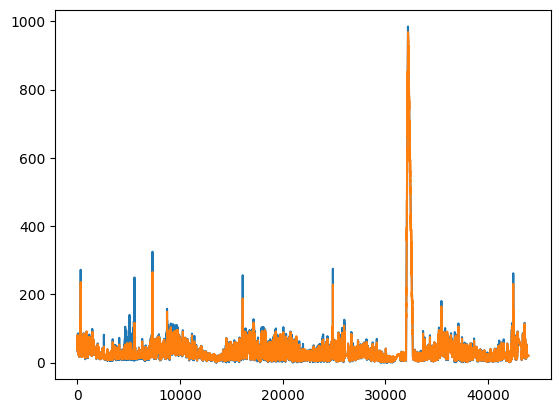

In [44]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9923846401029708


In [46]:
import joblib
joblib.dump(model, 'TamilNadu_PM2.5_µgm³.pkl')

['TamilNadu_PM2.5_µgm³.pkl']

In [47]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
pred_check2 = model.predict(X)

In [49]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9111602492881832


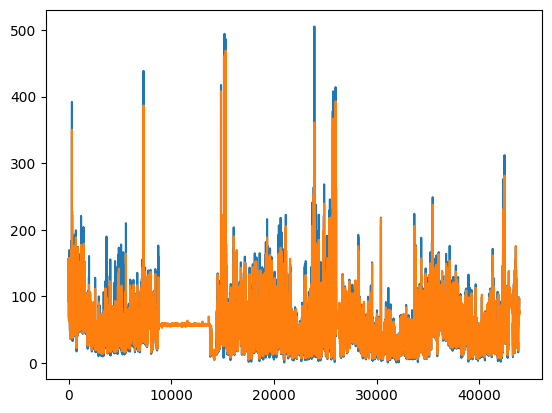

In [50]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [51]:
joblib.dump(model, 'TamilNadu_PM10_µgm³.pkl')

['TamilNadu_PM10_µgm³.pkl']